In [3]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.

`summarise()` regrouping output by 'school', 'G1', 'G2' (override with `.groups` argument)



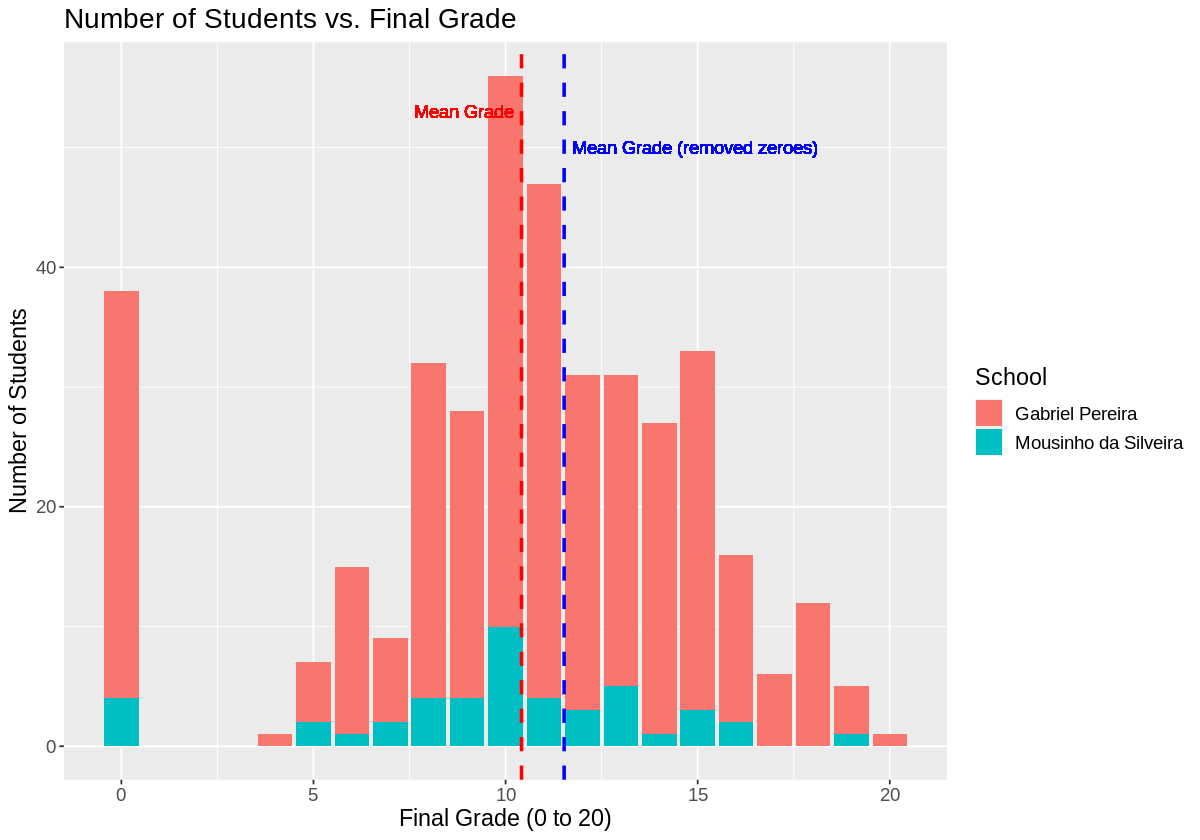

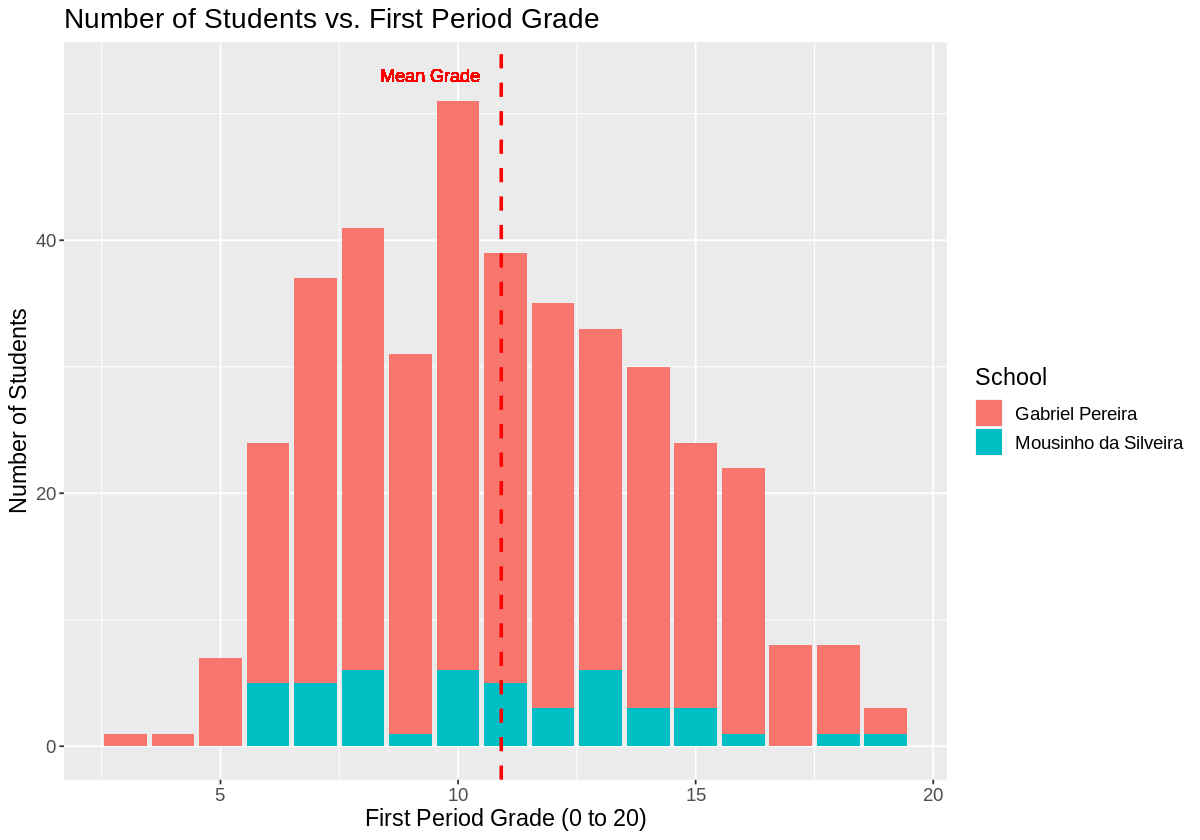

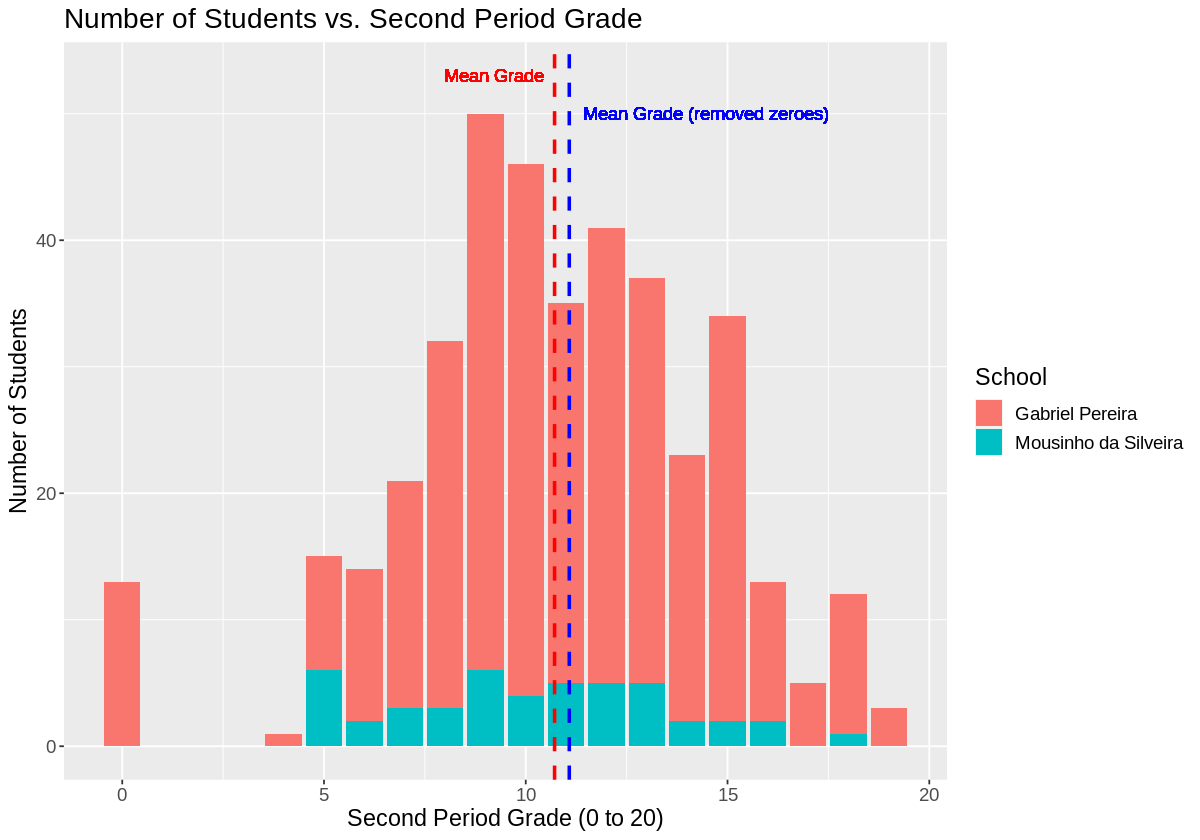

In [5]:
data_renamed <- read_delim("Data/student-mat.csv", delim = ";")
data_renamed$school <- gsub("GP", "Gabriel Pereira", data_renamed$school)
data_renamed$school <- gsub("MS", "Mousinho da Silveira", data_renamed$school)

data_with_n_students <- data_renamed %>%
    group_by(school, G1, G2, G3) %>%
    summarize(n = n()) %>%
    arrange(n)


# graph for final grades (G3) -----------
data_G3_no_zero <- data_renamed %>%
    filter(G3 != "0")

options(repr.plot.width = 10, repr.plot.height = 7)
data_G3_school_plot <- data_with_n_students %>%
    ggplot(aes(x = G3, y = n, fill = school)) +
    geom_bar(stat = "identity", position = "stack") +
    theme(text = element_text(size=14)) +

    # mean grade line
    geom_vline(aes(xintercept = mean(data_renamed$G3)), color = "red", linetype = "dashed", size = 1) +
    geom_text(aes(x = mean(data_renamed$G3) - 1.5, label = "Mean Grade", y = 53), color = "red", angle = 0) +    # text that says "Mean Grade" next to vline
    # mean grade line (without zeroes)
    geom_vline(aes(xintercept = mean(data_G3_no_zero$G3)), color = "blue", linetype = "dashed", size = 1) +
    geom_text(aes(x = mean(data_G3_no_zero$G3) + 3.4, label = "Mean Grade (removed zeroes)", y = 50), color = "blue", angle = 0) +

    labs(x = "Final Grade (0 to 20)", y = "Number of Students", fill = "School", title = "Number of Students vs. Final Grade")
data_G3_school_plot


# graph for first period grades (G1) -----------
data_G1_no_zero <- data_renamed %>%
    filter(G1 != "0")

options(repr.plot.width = 10, repr.plot.height = 7)
data_G1_school_plot <- data_with_n_students %>%
    ggplot(aes(x = G1, y = n, fill = school)) +
    geom_bar(stat = "identity", position = "stack") +
    theme(text = element_text(size=14)) +

    # mean grade line
    geom_vline(aes(xintercept = mean(data_renamed$G1)), color = "red", linetype = "dashed", size = 1) +
    geom_text(aes(x = mean(data_renamed$G1) - 1.5, label = "Mean Grade", y = 53), color = "red", angle = 0) +    # text that says "Mean Grade" next to vline
#     # mean grade line (without zeroes) --- G1 has no 0 values
#     geom_vline(aes(xintercept = mean(data_G1_no_zero$G1)), color = "blue", linetype = "dashed", size = 1) +
#     geom_text(aes(x = mean(data_G1_no_zero$G1) + 3.4, label = "Mean Grade (removed zeroes)", y = 50), color = "blue", angle = 0) +

    labs(x = "First Period Grade (0 to 20)", y = "Number of Students", fill = "School", title = "Number of Students vs. First Period Grade")
data_G1_school_plot


# graph for second period grades (G2) -----------
data_G2_no_zero <- data_renamed %>%
    filter(G2 != "0")

options(repr.plot.width = 10, repr.plot.height = 7)
data_G2_school_plot <- data_with_n_students %>%
    ggplot(aes(x = G2, y = n, fill = school)) +
    geom_bar(stat = "identity", position = "stack") +
    theme(text = element_text(size=14)) +

    # mean grade line
    geom_vline(aes(xintercept = mean(data_renamed$G2)), color = "red", linetype = "dashed", size = 1) +
    geom_text(aes(x = mean(data_renamed$G2) - 1.5, label = "Mean Grade", y = 53), color = "red", angle = 0) +    # text that says "Mean Grade" next to vline
    # mean grade line (without zeroes)
    geom_vline(aes(xintercept = mean(data_G2_no_zero$G2)), color = "blue", linetype = "dashed", size = 1) +
    geom_text(aes(x = mean(data_G2_no_zero$G2) + 3.4, label = "Mean Grade (removed zeroes)", y = 50), color = "blue", angle = 0) +

    labs(x = "Second Period Grade (0 to 20)", y = "Number of Students", fill = "School", title = "Number of Students vs. Second Period Grade")
data_G2_school_plot